In [4]:
# Import sys, then tell python where to find the nEXO-specific classes
# I'll assume you're in the sensitivity/work directory, as shown here by !pwd

import sys
!pwd
sys.path.append('../../../modules')

/g/g20/lenardo1/nEXO/sensitivity/work/SensitivityPaper2020_scripts/Xe137Study


In [5]:
# Import useful libraries for analysis

import pandas as pd
import histlite as hl
import numpy as np
from matplotlib import pyplot as plt
import os
import pickle

plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = (8,6)

from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')
colors=plt.rcParams['axes.prop_cycle'].by_key()['color']
print(colors)

['b', 'g', 'r', 'c', 'm', 'y', 'k']


In [6]:
# Import the nEXO sensitivity classes

import nEXOFitWorkspace
import nEXOFitModel
import nEXOFitLikelihood

In [7]:
critical_lambda_dir = '/p/lustre2/lenardo1/sensitivity_output/Mar7_Xe137_CriticalLambda_D024/'

scale_factors = ['00.1x','03.0x','10.0x','100.0x']

dataframes_dict = dict()

for factor in scale_factors: 
    print('Loading {}'.format(factor))
    with open(critical_lambda_dir+'master_df_list_rn222_{}_D-024.pkl'.format(factor),\
              'rb') as pklfile:
        dataframes_dict[factor] = pickle.load(pklfile)




Loading 00.1x
Loading 03.0x
Loading 10.0x
Loading 100.0x


In [8]:
# ## Make the histograms for different values of the signal PDF

# print('\nD-023')
# hist_list_d023 = []
# array_list_d023 = []
# hypotheses_d023 = []

# for i in range(len(masterdflist_d023)):
    
#     mask = masterdflist_d023[i]['fixed_fit_covar'] & masterdflist_d023[i]['best_fit_covar']
#     hypotheses_d023.append(masterdflist_d023[i].loc[0,'fixed_fit_parameters']['Num_FullLXeBb0n'])
    
#     if i % 4 == 0:
#         print('Hypothesis: {:4.4} cts \t Fit convergence: {:4.4}%'.format(\
#                             hypotheses_d023[i], np.sum(mask)/len(mask)*100))
    
#     hist_list_d023.append( hl.hist( masterdflist_d023[i]['lambda'].loc[mask], bins=np.linspace(0.,20.,100) ) )
    
#     array_list_d023.append( masterdflist_d023[i]['lambda'].loc[mask] )
    

    
print('\nD-024')
## Make the histograms for different values of the signal PDF
hist_list = dict()
array_list = dict()
hypotheses = dict()

for factor in scale_factors:
    
    hypotheses[factor] = []
    hist_list[factor] = []
    array_list[factor] = []

    print('Running {}'.format(factor))
    for i in range(len(dataframes_dict[factor])):

        mask = dataframes_dict[factor][i]['fixed_fit_covar'] & dataframes_dict[factor][i]['best_fit_covar']
        hypotheses[factor].append(dataframes_dict[factor][i].loc[0,'fixed_fit_parameters']['Num_FullLXeBb0n'])

#         if i % 4 == 0:
#             print('Hypothesis: {:4.4} cts \t Fit convergence: {:4.4}%'.format(\
#                                 hypotheses[factor][i], np.sum(mask)/len(mask)*100))

        hist_list[factor].append( hl.hist( dataframes_dict[factor][i]['lambda'].loc[mask], bins=np.linspace(0.,20.,100) ) )

        array_list[factor].append( dataframes_dict[factor][i]['lambda'].loc[mask] )





D-024
Running 00.1x
Running 03.0x
Running 10.0x
Running 100.0x


In [9]:
thresholds = dict()
for factor in scale_factors:
    thresholds[factor] = [ np.quantile( array, 0.90 ) for array in array_list[factor]]

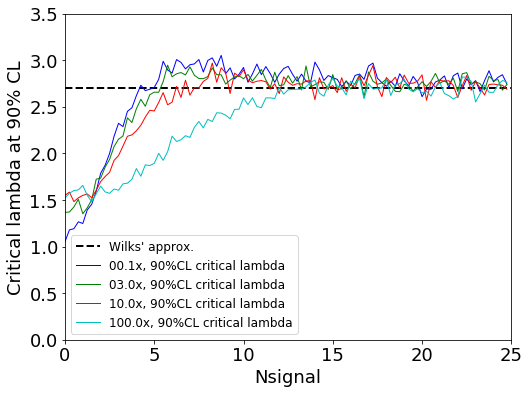

In [10]:
from scipy.interpolate import LSQUnivariateSpline
plt.rcParams['figure.figsize'] = (8,6)


xarray = np.linspace(0.,60.,300)
plt.plot(xarray,np.ones(300)*2.706,'--k',linewidth=2,label='Wilks\' approx.')


for factor in scale_factors:

    plt.plot( np.array(hypotheses[factor]), \
             np.array(thresholds[factor])  , \
             linewidth=1,\
             markersize=3,\
             label='{}, 90%CL critical lambda'.format(factor))


plt.xlim(0.,25.)
plt.ylim(0.,3.5)
plt.xlabel('Nsignal')
plt.ylabel('Critical lambda at 90% CL')

plt.legend(fontsize=12)

plt.savefig('critical_lambda_curves_for_d024_with_different_scale_factors.png',dpi=200,bbox_inches='tight')




#plt.savefig('Plots/critical_lambda_calculated_vs_wilks_approx.png',dpi=200,bbox_inches='tight')

# critical_lambda_data = np.transpose( np.genfromtxt('critical_lambda_ba_tagging.txt') )
# spline_xn = np.append( np.linspace(1.,15.,29), np.linspace(16., 25., 5) ) # Defines the locations of the knots
# spline_xn = np.append( spline_xn, 50. ) # Defines the locations of the knots
# #SplineFunc = LSQUnivariateSpline(np.array(hypotheses[0:-1]),np.array(thresholds),t = spline_xn)
# SplineFunc = LSQUnivariateSpline(critical_lambda_data[:,0],critical_lambda_data[:,1],t = spline_xn)
#critical_lambda_data_d023 = 




In [13]:
for factor in scale_factors:
    data = np.transpose( np.array([ np.array(hypotheses[factor]), \
                                   np.array(thresholds[factor]) ]) )
    #print('Factor {}'.format(factor))
    #print(data)
    output_filename = 'CriticalLambdaCurves/critical_lambda_xe137study_merged-v11_D024_{}.txt'.format(factor)
    
    
    np.savetxt(output_filename,data)


In [11]:
for factor in scale_factors:
    print(hypotheses[factor][3])



0.75
0.75
0.75
0.75


3037.0
3179.0
3302.0
3248.0


Text(0.5, 1.0, 'Null distribution at 0 signal')

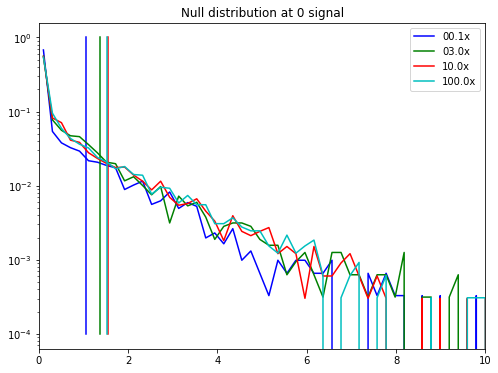

In [10]:

i=0
for factor in scale_factors:
    
    array = array_list[factor][0]
    quantile = np.quantile(array,0.9)

    
    hist = hist_list[factor][0]
    bin_centers = (hist.bins[0][1:] + hist.bins[0][0:-1])/2.
    
    #hl.plot1d(hist_list[factor][0],label=factor)
    plt.plot(bin_centers,hist.values/np.sum(hist.values),color=colors[i],label=factor)
    
    plt.plot(np.ones(10)*quantile,np.logspace(-4.,0.,10),color=colors[i])
    
    print(np.sum(hist.values))
             
    i+=1
    
    
plt.legend()
plt.yscale('log')
plt.xlim(0.,10.)
#plt.ylim(0.8,3.e3)
plt.title("Null distribution at 0 signal")


In [11]:
def Chi2(q):
    return 1 / np.sqrt(2.*np.pi) / np.sqrt(q) * np.exp(-q/2.)


00.1x
Quantile: 1.0511523312915683
3037.0
03.0x
Quantile: 1.3672918152242264
3179.0
10.0x
Quantile: 1.550180576060368
3302.0
100.0x
Quantile: 1.5213179443487992
3248.0


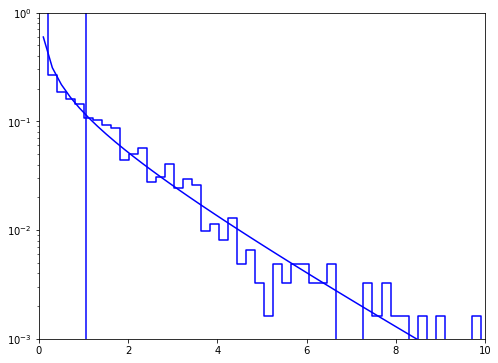

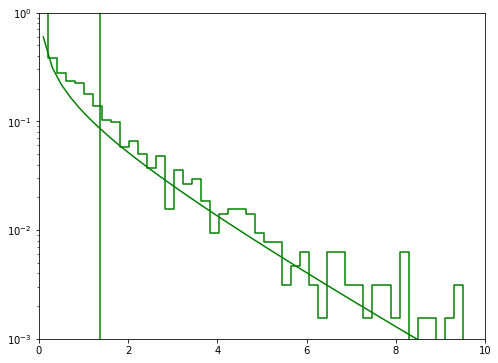

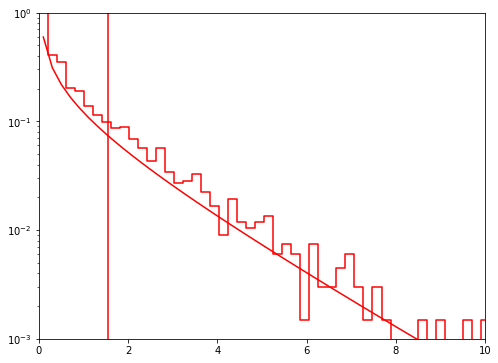

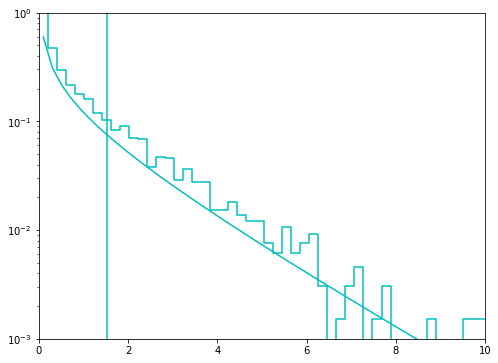

In [12]:
i=0
for factor in scale_factors:
    print(factor)
    plt.figure(i)
    
    array = array_list[factor][0]
    quantile = np.quantile(array,0.9)

    
    hist = hist_list[factor][0]
    bin_centers = (hist.bins[0][1:] + hist.bins[0][0:-1])/2.
    bin_width = (hist.bins[0][1]-hist.bins[0][0])
    
    hl.plot1d(hist_list[factor][0]/np.sum(hist.values)/bin_width,label=factor,color=colors[i])
    #plt.plot(bin_centers,hist.values/np.sum(hist.values)/bin_width,color=colors[i],label=factor)
    
    plt.plot(np.ones(10)*quantile,np.logspace(-4.,0.,10),color=colors[i])
    
    print('Quantile: {}'.format(quantile))
    plt.plot(bin_centers,Chi2(bin_centers)/2.,color=colors[i])
    
    print(np.sum(hist.values))
             
    i+=1
    
    plt.xlim(0.,10.)
    plt.ylim(1.e-3,1.)
    plt.yscale('log')

0.9917531642591
90% quantile of chi2: 2.718627186271863
90% quantile of halfchi2: 1.6544165441654417


/g/g20/lenardo1/localpythonpackages/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


(0.0, 5.0)

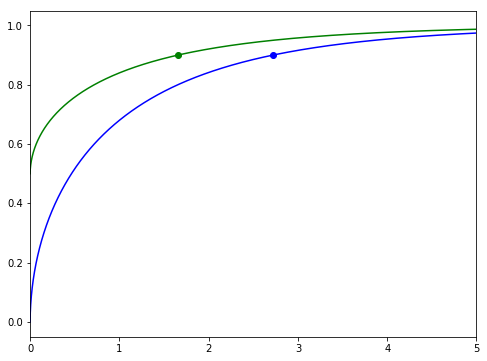

In [13]:
xvalues = np.linspace(0.,20.,100000)
yvalues = Chi2(xvalues)
yvalues[0] = 0.

print(sum(yvalues) * (xvalues[1] - xvalues[0]))

cum_chi2 = np.cumsum(yvalues) * (xvalues[1] - xvalues[0])
cum_chi2 = cum_chi2/cum_chi2[-1]

cum_halfchi2 = 0.5 + 0.5 * cum_chi2
cum_halfchi2 = cum_halfchi2/cum_halfchi2[-1]

chi2_idx = np.where(cum_chi2>0.9)[0][0]
halfchi2_idx = np.where(cum_halfchi2>0.9)[0][0]

plt.plot(xvalues,cum_chi2,color=colors[0])
plt.plot(xvalues[chi2_idx],cum_chi2[chi2_idx],'o',color=colors[0])
print('90% quantile of chi2: {}'.format(xvalues[chi2_idx]))

plt.plot(xvalues,cum_halfchi2,color=colors[1])
plt.plot(xvalues[halfchi2_idx],cum_halfchi2[halfchi2_idx],'o',color=colors[1])
print('90% quantile of halfchi2: {}'.format(xvalues[halfchi2_idx]))

plt.xlim(0.,5.)


In [11]:
from scipy.interpolate import LSQUnivariateSpline
import copy


plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams.update({'font.size': 18})

thresholds_d024 = [ np.quantile( array, 0.90 ) for array in array_list_d024]
xarray = np.linspace(0.,60.,300)


plt.plot(xarray,np.ones(300)*2.706,'-r',linewidth=2,label='Wilks\' approx.')

spline_xn = np.array([1., 5., 7., 10., 20.]) # defines the locations of the knots
SplineFunc = LSQUnivariateSpline(np.array(hypotheses_d024),np.array(thresholds_d024),t = spline_xn,k=3)

plt.plot( np.array(hypotheses_d024), \
         np.array(thresholds_d024), '-ob'  , \
         linewidth=1,\
         markersize=4,\
         label='D-024 90%CL critical lambda')

xsplinevals = np.linspace(0.,25.,100)
ysplinevals = SplineFunc(xsplinevals)

plt.plot(xsplinevals,ysplinevals,'--k',label='Spline fit',linewidth=1)

plt.xlim(0.,25.)
plt.ylim(0.,3.5)
plt.xlabel('Nsignal')
plt.ylabel('Critical lambda at 90% CL')

plt.legend(fontsize=16)

plt.savefig('critical_lambda_curve_for_d024_with_spline.png',dpi=200,bbox_inches='tight')




NameError: name 'array_list_d024' is not defined

# Illustrate the distributions of q_Ns at different values of Nsignal

In [13]:
print('Distance between subsequent points: {}'.format(hypotheses_d024[1]-hypotheses_d024[0]))



Distance between subsequent points: 0.25


In [14]:
points_to_show = [1.,4.,10.]


hypothesis_spacing = hypotheses_d024[1]-hypotheses_d024[0]

histograms = []
true_hypotheses = []

for point in points_to_show:
    idx = int(point/hypothesis_spacing)
    
    true_hypotheses.append(hypotheses_d024[idx])
    histograms.append( hl.hist(array_list_d024[idx],bins=np.linspace(0.,10.,60)) )
    

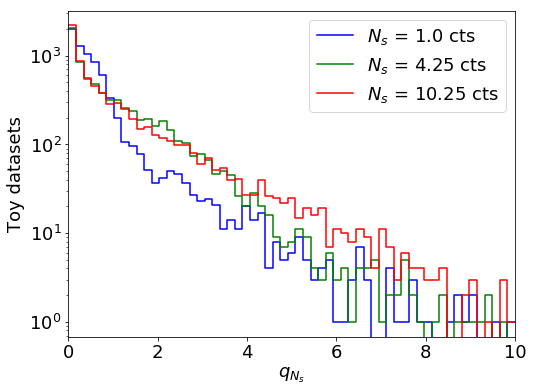

In [15]:
for i in range(len(true_hypotheses)):
    hl.plot1d(histograms[i],label=r'$N_s$ = {} cts'.format(true_hypotheses[i]))
    
    
plt.legend()
plt.xlabel(r'$q_{N_s}$')
plt.ylabel('Toy datasets')
plt.yscale('log')

plt.xlim(0.,10.)
plt.savefig('critical_lambda_calculation_q_distributions_at_different_Nsig.png',\
            dpi=200,bbox_inches='tight')


# Critical lambda curves with the best-fit median values.

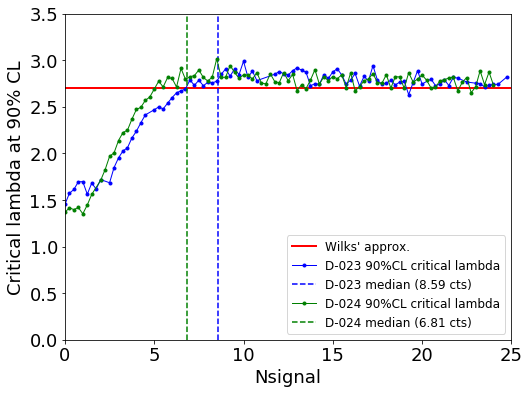

In [16]:
from scipy.interpolate import LSQUnivariateSpline
plt.rcParams['figure.figsize'] = (8,6)

thresholds_d023 = [ np.quantile( array, 0.90 ) for array in array_list_d023]
thresholds_d024 = [ np.quantile( array, 0.90 ) for array in array_list_d024]
xarray = np.linspace(0.,60.,300)


plt.plot(xarray,np.ones(300)*2.706,'-r',linewidth=2,label='Wilks\' approx.')



plt.plot( np.array(hypotheses_d023), \
         np.array(thresholds_d023), '-ob'  , \
         linewidth=1,\
         markersize=3,\
         label='D-023 90%CL critical lambda')
plt.plot(np.ones(10)*8.59,np.linspace(0.,3.5,10),'--b',label='D-023 median (8.59 cts)')
plt.plot( np.array(hypotheses_d024), \
         np.array(thresholds_d024), '-og'  , \
         linewidth=1,\
         markersize=3,\
         label='D-024 90%CL critical lambda')
plt.plot(np.ones(10)*6.81,np.linspace(0.,3.5,10),'--g',label='D-024 median (6.81 cts)')

plt.xlim(0.,25.)
plt.ylim(0.,3.5)
plt.xlabel('Nsignal')
plt.ylabel('Critical lambda at 90% CL')

plt.legend(fontsize=12)

plt.savefig('critical_lambda_curves_for_d023_and_d024.png',dpi=200,bbox_inches='tight')




#plt.savefig('Plots/critical_lambda_calculated_vs_wilks_approx.png',dpi=200,bbox_inches='tight')

# critical_lambda_data = np.transpose( np.genfromtxt('critical_lambda_ba_tagging.txt') )
# spline_xn = np.append( np.linspace(1.,15.,29), np.linspace(16., 25., 5) ) # Defines the locations of the knots
# spline_xn = np.append( spline_xn, 50. ) # Defines the locations of the knots
# #SplineFunc = LSQUnivariateSpline(np.array(hypotheses[0:-1]),np.array(thresholds),t = spline_xn)
# SplineFunc = LSQUnivariateSpline(critical_lambda_data[:,0],critical_lambda_data[:,1],t = spline_xn)
#critical_lambda_data_d023 = 


# Plotting an example dataset

In [17]:
outputdir_d024 = '/p/lustre2/lenardo1/sensitivity_output/Jan3_Rn222Study_merged-v10b_OptimizedV1Binning_D024/'

all_files_d024 = os.listdir(outputdir_d024)
h5_files_d024 = [filename for filename in all_files_d024 if filename.endswith('.h5')]

dfdict_d024 = dict()

categories_list = ['01.0x']

for category in categories_list:
    print('Loading data for {}'.format(category))
    df_list_d024 = [pd.read_hdf(outputdir_d024+filename) for filename in h5_files_d024 if '_'+category+'_' in filename]
    dfdict_d024[category] = pd.concat(df_list_d024,ignore_index=True)
    print('---> Loaded {} toy datasets'.format(len(dfdict_d024[category])))
    




Loading data for 01.0x
---> Loaded 5000 toy datasets


In [18]:
dftests = dfdict_d024['01.0x']

Quadratic fit: [ 0.01873162  0.30880441 -0.0953295 ]


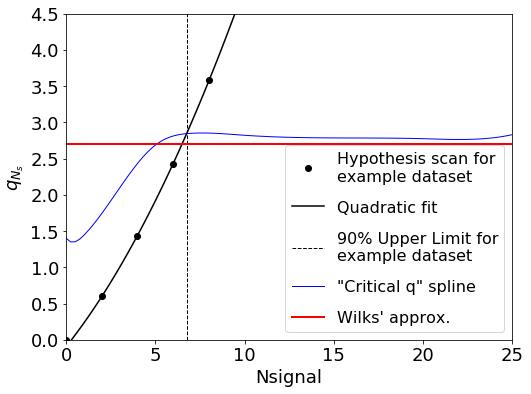

In [21]:
evt = 1

this_x = dftests['num_signal'].iloc[evt]
this_y = dftests['lambda'].iloc[evt]

mask = np.zeros(len(this_y),dtype=bool)
mask[1:] = ( this_y[1:] - this_y[:-1] ) > 0.
# Next, select only values near the critical lambda threshold (~2.7)
mask = mask&(this_y>0.5)&(this_y<6.)

xfit = np.linspace(0.,40.,10000)

if len( this_x[mask] ) > 0:
        try:
                p = np.polyfit( this_x[mask], this_y[mask], 2)
                print('Quadratic fit: {}'.format(p))
                yfit = p[0]*xfit**2 + p[1]*xfit + p[2]
        except np.RankWarning:
                p = np.polyfit( this_x[mask], this_y[mask], 1)
                print('Linear fit: {}'.format(p))
                yfit = p[0]*xfit + p[1]
        yspline = SplineFunc(xfit)
        crossing_idx = np.where( (yfit - yspline)>0. )[0][0]
        crossing = xfit[crossing_idx]
else:
        yfit = np.zeros(len(xfit))
        crossing_idx = -1
        crossing = -1.


plt.plot(this_x,this_y,'o',color='k',label='Hypothesis scan for\nexample dataset')

xplot = np.linspace(0.,20.,100)
if len(p) == 3:
    yplot = p[0]*xplot**2 + p[1]*xplot + p[2]
else:
    yplot = p[0]*xplot + p[1]
plt.plot(xplot,yplot,'-k',label='Quadratic fit')

plt.plot(np.ones(10)*crossing,np.linspace(0.,10.,10),'--k',linewidth=1,label='90% Upper Limit for\nexample dataset')

xsplinevals = np.linspace(0.,25.,100)
ysplinevals = SplineFunc(xsplinevals)

plt.plot(xsplinevals,ysplinevals,'-b',label='\"Critical q\" spline',linewidth=1)
plt.plot(xarray,np.ones(300)*2.706,'-r',linewidth=2,label='Wilks\' approx.')

plt.xlim(0.,25.)
plt.ylim(0.,4.5)
plt.xlabel('Nsignal')
plt.ylabel(r'$q_{N_s}$')

plt.legend(fontsize=16,labelspacing=1.)

plt.savefig('example_fit_and_upper_limit.png',dpi=200,bbox_inches='tight')



# Comparison with Steven's critical lambda

In [14]:
mine_d024 = np.genfromtxt('CriticalLambdaCurves/critical_lambda_90CL_mergedv8_D-024_10yr.txt')
mine_d023 = np.genfromtxt('CriticalLambdaCurves/critical_lambda_90CL_mergedv8_D-023_10yr.txt')

stevens_d024 = np.genfromtxt('CriticalLambdaCurves/steven_lambdas_0.008_20_12_22_D024.txt')
stevens_d023 = np.genfromtxt('CriticalLambdaCurves/steven_lambdas_0.008_20_12_22_D023.txt')




In [5]:
stevens_x = np.linspace(0.,30.25,122)
print(stevens_x)

[ 0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75
  3.    3.25  3.5   3.75  4.    4.25  4.5   4.75  5.    5.25  5.5   5.75
  6.    6.25  6.5   6.75  7.    7.25  7.5   7.75  8.    8.25  8.5   8.75
  9.    9.25  9.5   9.75 10.   10.25 10.5  10.75 11.   11.25 11.5  11.75
 12.   12.25 12.5  12.75 13.   13.25 13.5  13.75 14.   14.25 14.5  14.75
 15.   15.25 15.5  15.75 16.   16.25 16.5  16.75 17.   17.25 17.5  17.75
 18.   18.25 18.5  18.75 19.   19.25 19.5  19.75 20.   20.25 20.5  20.75
 21.   21.25 21.5  21.75 22.   22.25 22.5  22.75 23.   23.25 23.5  23.75
 24.   24.25 24.5  24.75 25.   25.25 25.5  25.75 26.   26.25 26.5  26.75
 27.   27.25 27.5  27.75 28.   28.25 28.5  28.75 29.   29.25 29.5  29.75
 30.   30.25]


Text(0.5, 1.0, 'D023')

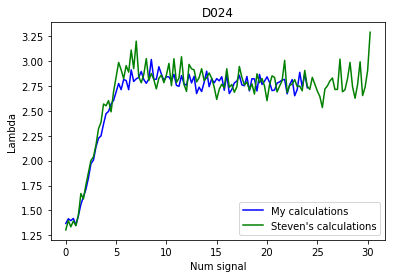

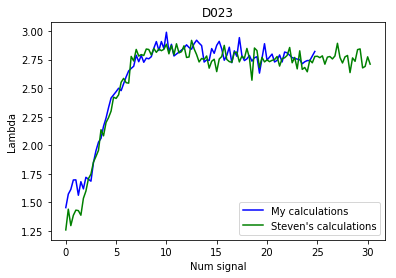

In [6]:
plt.plot(mine_d024[:,0],mine_d024[:,1],'-b',label='My calculations')
plt.plot(stevens_x,stevens_d024,'-g',label='Steven\'s calculations')
plt.xlabel('Num signal')
plt.ylabel('Lambda')
plt.title('D024')
plt.legend()


plt.figure(2)
plt.plot(mine_d023[:,0],mine_d023[:,1],'-b',label='My calculations')
plt.plot(stevens_x,stevens_d023,'-g',label='Steven\'s calculations')
plt.xlabel('Num signal')
plt.ylabel('Lambda')
plt.legend()
plt.title('D023')



In [34]:
output_array = np.transpose(np.vstack([stevens_x,stevens_d024]))

In [37]:
np.savetxt('CriticalLambdaCurves/steven_2column_lambdas_0.008_20_12_22_D024.txt',output_array)

Text(0.5, 1.0, "Spline fits to Steven's critical lambda calc")

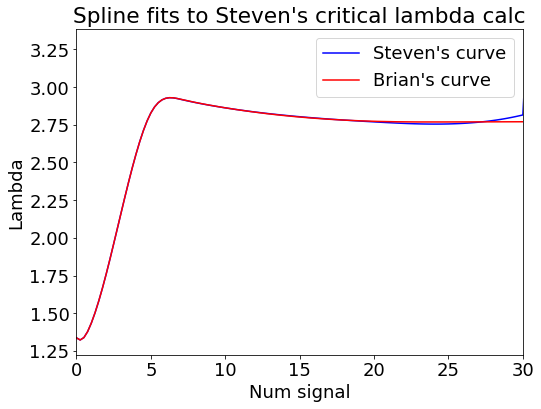

In [12]:
from scipy.interpolate import LSQUnivariateSpline
import copy


steven_knots = np.array([1., 5., 7., 10., 20., 30])
StevenSplineFunc = LSQUnivariateSpline(stevens_x,stevens_d024,t=steven_knots,k=3)

xcrit = stevens_x
ycrit = stevens_d024
for i in range(int(xcrit[-1]+1.),100):
    xcrit = np.append(xcrit,float(i))
    ycrit = np.append(ycrit,2.71)
brian_knots = np.array([1., 5., 7., 10., 20., 30, 49])
                
BrianSplineFunc = LSQUnivariateSpline(xcrit,ycrit,t=brian_knots,k=3)


plt.plot(stevens_x,StevenSplineFunc(stevens_x),'-b',label='Steven\'s curve')

plt.plot(xcrit,BrianSplineFunc(xcrit),'-r',label='Brian\'s curve')

plt.xlim(0.,30.)
plt.legend()
plt.xlabel('Num signal')
plt.ylabel('Lambda')
plt.title('Spline fits to Steven\'s critical lambda calc')


                        
                        












# Critical lambda for Rn222 x 0.1

In [6]:
critical_lambda_dir = '/p/lustre2/lenardo1/sensitivity_output/Jan26_Rn222_CriticalLambda_D024/'

all_files = os.listdir( critical_lambda_dir )

h5_files = []

for i in range(10):
    h5_files.append( [filename for filename in all_files if filename.endswith('_{}.h5'.format(i))] )
    


In [7]:
dflist = []
inputcounts = []
sorteddflist = []

for i in range(10):
    
    print('Running {}'.format(i))
    
    dflist.append([])
    inputcounts.append([])
    sorteddflist.append([])

    for filename in h5_files[i]:
        
        dflist[i].append( pd.read_hdf( critical_lambda_dir + filename ) )
        inputcounts[i].append( float(filename.split('_')[-3]) )
    sorteddflist[i] = [x for _,x in sorted( zip(inputcounts[i], dflist[i]) ) ]


Running 0
Running 1
Running 2
Running 3
Running 4
Running 5
Running 6
Running 7
Running 8
Running 9


In [8]:
# First, combine the 0 and 1 lists to get one master list
masterdflist = []

for i in range(len(sorteddflist[0])):
    #masterdflist.append( sorteddflist1[i] )
    print('Running {}'.format(i))
    
    temp_list = [ sorteddflist[j][i] for j in range(10) ]
    masterdflist.append( pd.concat( temp_list, ignore_index=True ) )
    
    
    

Running 0
Running 1
Running 2
Running 3
Running 4
Running 5
Running 6
Running 7
Running 8
Running 9
Running 10
Running 11
Running 12
Running 13
Running 14
Running 15
Running 16
Running 17
Running 18
Running 19
Running 20
Running 21
Running 22
Running 23
Running 24
Running 25
Running 26
Running 27
Running 28
Running 29
Running 30
Running 31
Running 32
Running 33
Running 34
Running 35
Running 36
Running 37
Running 38
Running 39
Running 40
Running 41
Running 42
Running 43
Running 44
Running 45
Running 46
Running 47
Running 48
Running 49
Running 50
Running 51
Running 52
Running 53
Running 54
Running 55
Running 56
Running 57
Running 58
Running 59
Running 60
Running 61
Running 62
Running 63
Running 64
Running 65
Running 66
Running 67
Running 68
Running 69
Running 70
Running 71
Running 72
Running 73
Running 74
Running 75
Running 76
Running 77
Running 78
Running 79
Running 80
Running 81
Running 82
Running 83
Running 84
Running 85
Running 86
Running 87
Running 88
Running 89
Running 90
Running 9

IndexError: list index out of range

In [10]:
with open(critical_lambda_dir + 'master_df_list_rn222_00.1x.pkl','wb') as pklfile:
    pickle.dump(masterdflist,pklfile)

In [11]:
## Make the histograms for different values of the signal PDF

print('\nD-023')
hist_list = []
array_list = []
hypotheses = []

for i in range(len(masterdflist)):
    
    mask = masterdflist[i]['fixed_fit_covar'] & masterdflist[i]['best_fit_covar']
    hypotheses.append(masterdflist[i].loc[0,'fixed_fit_parameters']['Num_FullLXeBb0n'])
    
    if i % 4 == 0:
        print('Hypothesis: {:4.4} cts \t Fit convergence: {:4.4}%'.format(\
                            hypotheses[i], np.sum(mask)/len(mask)*100))
    
    hist_list.append( hl.hist( masterdflist[i]['lambda'].loc[mask], bins=np.linspace(0.,20.,100) ) )
    
    array_list.append( masterdflist[i]['lambda'].loc[mask] )
    



D-023
Hypothesis:  0.0 cts 	 Fit convergence: 99.84%
Hypothesis:  1.0 cts 	 Fit convergence: 99.82%
Hypothesis:  2.0 cts 	 Fit convergence: 99.78%
Hypothesis:  3.0 cts 	 Fit convergence: 99.88%
Hypothesis:  4.0 cts 	 Fit convergence: 99.88%
Hypothesis:  5.0 cts 	 Fit convergence: 99.82%
Hypothesis:  6.0 cts 	 Fit convergence: 99.82%
Hypothesis:  7.0 cts 	 Fit convergence: 99.8%
Hypothesis:  8.0 cts 	 Fit convergence: 99.8%
Hypothesis:  9.0 cts 	 Fit convergence: 99.9%
Hypothesis: 10.0 cts 	 Fit convergence: 99.88%
Hypothesis: 11.0 cts 	 Fit convergence: 99.84%
Hypothesis: 12.0 cts 	 Fit convergence: 99.78%
Hypothesis: 13.0 cts 	 Fit convergence: 99.88%
Hypothesis: 14.0 cts 	 Fit convergence: 99.78%
Hypothesis: 15.0 cts 	 Fit convergence: 99.84%
Hypothesis: 16.0 cts 	 Fit convergence: 99.82%
Hypothesis: 17.0 cts 	 Fit convergence: 99.88%
Hypothesis: 18.0 cts 	 Fit convergence: 99.92%
Hypothesis: 19.0 cts 	 Fit convergence: 99.86%
Hypothesis: 20.0 cts 	 Fit convergence: 99.9%
Hypothesis

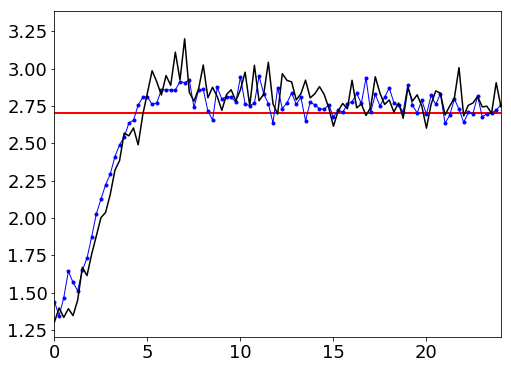

In [15]:
from scipy.interpolate import LSQUnivariateSpline
plt.rcParams['figure.figsize'] = (8,6)

thresholds = [ np.quantile( array, 0.90 ) for array in array_list]
xarray = np.linspace(0.,60.,300)


plt.plot(xarray,np.ones(300)*2.706,'-r',linewidth=2,label='Wilks\' approx.')



plt.plot( np.array(hypotheses), \
         np.array(thresholds), '-ob'  , \
         linewidth=1,\
         markersize=3,\
         label='D-023 90%CL critical lambda')
plt.xlim(0.,24.)

stevens_x = np.linspace(0.,30.25,122)

plt.plot(stevens_x,stevens_d024,'-k')
